# &#128060; Parcial 4 Python &#128060;

### Universidad del Quindío / Juan Pablo Cobo Trujillo

### Importar Módulos

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime #Para manejo de fechas
import pytz #Para zonas horarias
import json #Para archivos json
from pandas.io.json import json_normalize #Para normalizar archivos json
from pandas.io.pytables import HDFStore #Para manejar archivos h5
from sklearn.linear_model import LinearRegression

### Importar base de datos

In [24]:
Codigos = pd.read_csv('AirportCodes.csv')
Cryptos = pd.read_csv('dataset.csv')

### 1. Clase para leer la bases de datos y herencia con el comando super

In [25]:
class Data():
    def __init__(self, ruta):
        df = pd.read_csv(ruta)
    def Frame(self, ruta):
        fr = pd.DataFrame(Codigos)
        return(display(fr))
    def Val(self):
        return(Codigos.describe())

In [26]:
class SubData(Data):
    def __init__(self, ruta):
        super().__init__(self, ruta)
    def Del(self):
        return(display(Codigos.drop(['iata_code'], axis=1)))

In [27]:
Cod = Data('AirportCodes.csv')
print('\t BASE DE DATOS SOBRE CÓDIGOS DE AEROPUERTOS')
Cod.Frame('AirportCodes.csv')
print()
print('\t A continuación tiene los valores media, meadiana, máx, mín, entre otros')
print()
Cod.Val()


	 BASE DE DATOS SOBRE CÓDIGOS DE AEROPUERTOS


,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022"
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968"
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087"
...,...,...,...,...,...,...,...,...,...,...,...,...
57416,ZYYK,medium_airport,Yingkou Lanqi Airport,0.0,AS,CN,CN-21,Yingkou,ZYYK,YKH,NaN,"122.3586, 40.542524"
57417,ZYYY,medium_airport,Shenyang Dongta Airport,NaN,AS,CN,CN-21,Shenyang,ZYYY,NaN,NaN,"123.49600219726562, 41.784400939941406"
57418,ZZ-0001,heliport,Sealand Helipad,40.0,EU,GB,GB-ENG,Sealand,NaN,NaN,NaN,"1.4825, 51.894444"
57419,ZZ-0002,small_airport,Glorioso Islands Airstrip,11.0,AF,TF,TF-U-A,Grande Glorieuse,NaN,NaN,NaN,"47.296388888900005, -11.584277777799999"



	 A continuación tiene los valores media, meadiana, máx, mín, entre otros



,elevation_ft
count,49608.000000
mean,1253.371775
std,1615.482592
min,-1266.000000
25%,208.000000
50%,722.000000
75%,1519.000000
max,29977.000000


### A continuación, valores nulos y eliminación de filas o columnas de datos NaN

In [28]:
Codigos.isnull()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,False,False,False,False,True,False,False,False,False,True,False,False
1,False,False,False,False,True,False,False,False,False,True,False,False
2,False,False,False,False,True,False,False,False,False,True,False,False
3,False,False,False,False,True,False,False,False,False,True,False,False
4,False,False,False,False,True,False,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
57416,False,False,False,False,False,False,False,False,False,False,True,False
57417,False,False,False,True,False,False,False,False,False,True,True,False
57418,False,False,False,False,False,False,False,False,True,True,True,False
57419,False,False,False,False,False,False,False,False,True,True,True,False


In [29]:
(Codigos.isnull()).any()

ident           False
type            False
name            False
elevation_ft     True
continent        True
iso_country      True
iso_region      False
municipality     True
gps_code         True
iata_code        True
local_code       True
coordinates     False
dtype: bool

In [30]:

display(Codigos.iata_code)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
57416    YKH
57417    NaN
57418    NaN
57419    NaN
57420    NaN
Name: iata_code, Length: 57421, dtype: object

In [31]:
display(Codigos.drop(['iata_code'], axis=1))


,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,local_code,coordinates
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,00A,"-74.93360137939453, 40.07080078125"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,00AA,"-101.473911, 38.704022"
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,00AK,"-151.695999146, 59.94919968"
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,00AL,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,"-91.254898, 35.6087"
...,...,...,...,...,...,...,...,...,...,...,...
57416,ZYYK,medium_airport,Yingkou Lanqi Airport,0.0,AS,CN,CN-21,Yingkou,ZYYK,NaN,"122.3586, 40.542524"
57417,ZYYY,medium_airport,Shenyang Dongta Airport,NaN,AS,CN,CN-21,Shenyang,ZYYY,NaN,"123.49600219726562, 41.784400939941406"
57418,ZZ-0001,heliport,Sealand Helipad,40.0,EU,GB,GB-ENG,Sealand,NaN,NaN,"1.4825, 51.894444"
57419,ZZ-0002,small_airport,Glorioso Islands Airstrip,11.0,AF,TF,TF-U-A,Grande Glorieuse,NaN,NaN,"47.296388888900005, -11.584277777799999"


In [32]:
(Codigos["coordinates"].isnull()).any()

False

In [33]:
Codigos['ident'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 57421 entries, 0 to 57420
Series name: ident
Non-Null Count  Dtype 
--------------  ----- 
57421 non-null  object
dtypes: object(1)
memory usage: 448.7+ KB


### 4. Cambiar una variable Categórica, además de otras cosas

In [34]:
display(Codigos)

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022"
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968"
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087"
...,...,...,...,...,...,...,...,...,...,...,...,...
57416,ZYYK,medium_airport,Yingkou Lanqi Airport,0.0,AS,CN,CN-21,Yingkou,ZYYK,YKH,NaN,"122.3586, 40.542524"
57417,ZYYY,medium_airport,Shenyang Dongta Airport,NaN,AS,CN,CN-21,Shenyang,ZYYY,NaN,NaN,"123.49600219726562, 41.784400939941406"
57418,ZZ-0001,heliport,Sealand Helipad,40.0,EU,GB,GB-ENG,Sealand,NaN,NaN,NaN,"1.4825, 51.894444"
57419,ZZ-0002,small_airport,Glorioso Islands Airstrip,11.0,AF,TF,TF-U-A,Grande Glorieuse,NaN,NaN,NaN,"47.296388888900005, -11.584277777799999"


In [35]:
Codigos.replace({"small_airport":"Aeropuerto Pequeño", "medium_airport":"Aeropuerto Mediano", "heliport":"Helipuerto",})

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,00A,Helipuerto,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"
1,00AA,Aeropuerto Pequeño,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022"
2,00AK,Aeropuerto Pequeño,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968"
3,00AL,Aeropuerto Pequeño,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087"
...,...,...,...,...,...,...,...,...,...,...,...,...
57416,ZYYK,Aeropuerto Mediano,Yingkou Lanqi Airport,0.0,AS,CN,CN-21,Yingkou,ZYYK,YKH,NaN,"122.3586, 40.542524"
57417,ZYYY,Aeropuerto Mediano,Shenyang Dongta Airport,NaN,AS,CN,CN-21,Shenyang,ZYYY,NaN,NaN,"123.49600219726562, 41.784400939941406"
57418,ZZ-0001,Helipuerto,Sealand Helipad,40.0,EU,GB,GB-ENG,Sealand,NaN,NaN,NaN,"1.4825, 51.894444"
57419,ZZ-0002,Aeropuerto Pequeño,Glorioso Islands Airstrip,11.0,AF,TF,TF-U-A,Grande Glorieuse,NaN,NaN,NaN,"47.296388888900005, -11.584277777799999"


### 5. Transformar los valores de columnas

In [36]:
print('\t Sacando raíz a la altura')
display(np.sqrt(Codigos['elevation_ft']))

	 Sacando raíz a la altura


C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0         3.316625
1        58.608873
2        21.213203
3        28.635642
4        15.394804
           ...    
57416     0.000000
57417          NaN
57418     6.324555
57419     3.316625
57420    18.384776
Name: elevation_ft, Length: 57421, dtype: float64

### 3. Gráficas
1. Usando otra base de datos ***Cryptos***, con el fin de hacer una correlación estre el precio de dos o más alimentos de la canasta

In [37]:
display(Cryptos)

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.000000e+00,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.000000e+00,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.000000e+00,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.000000e+00,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.000000e+00,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07
...,...,...,...,...,...,...,...,...,...,...
72941,72941,0.022604,0.022988,0.022197,0.022796,4.040134e+07,1.652957e+09,2022-10-23T23:59:59.999Z,VeChain,2022-10-23
72942,72942,1.468244,1.530464,1.435415,1.517878,2.844351e+07,1.572825e+09,2022-10-23T23:59:59.999Z,Flow,2022-10-23
72943,72943,4.950431,5.148565,4.945280,5.117206,1.069497e+08,1.559551e+09,2022-10-23T23:59:59.999Z,Filecoin,2022-10-23
72944,72944,0.000233,0.000243,0.000226,0.000239,2.143268e+08,1.576291e+09,2022-10-23T23:59:59.999Z,Terra Classic,2022-10-23


1. Regresión lineal de los datos de apertura y predicción de cierre

In [38]:
Apertura = Cryptos['open'].values.reshape(-1,1)
Cierre = Cryptos['close'].values.reshape(-1,1)
linear_regressor = LinearRegression()
linear_regressor.fit(Apertura, Cierre)
Cierre_pred = linear_regressor.predict(Apertura)

2. Gráfica

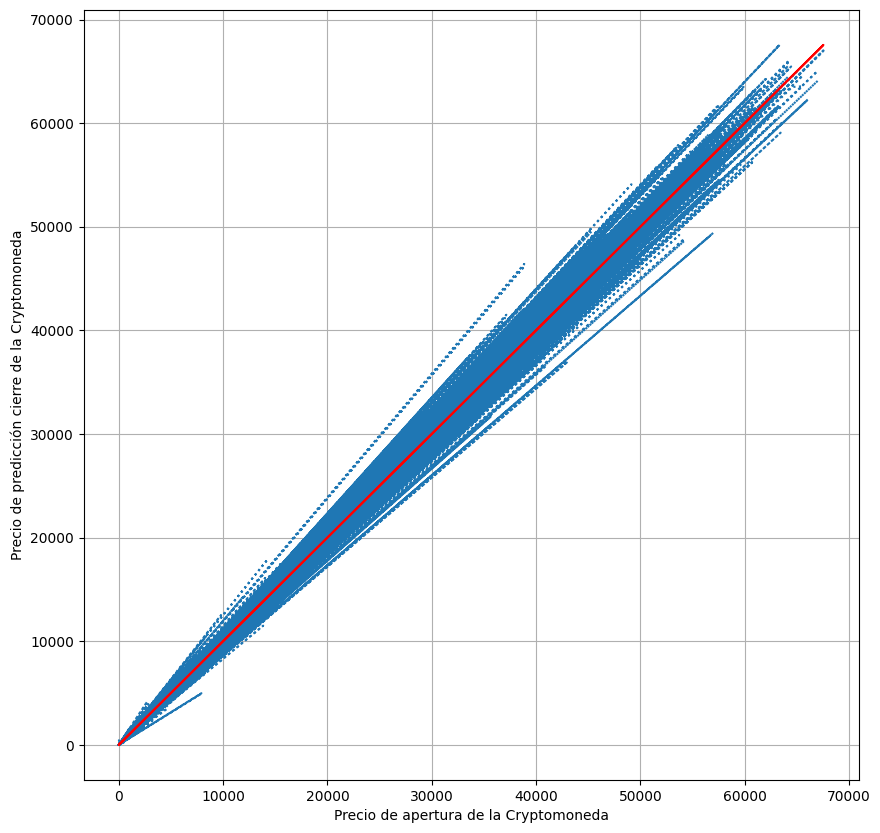

In [39]:
fig = plt.figure(figsize=(10,10))
#plt.scatter(Cryptos['open'], Cierre_pred)
plt.plot(Cryptos['open'], Cryptos['close'], ":")
plt.plot(Cryptos['open'], Cierre_pred, color='r')
plt.xlabel('Precio de apertura de la Cryptomoneda')
plt.ylabel('Precio de predicción cierre de la Cryptomoneda')
plt.grid()

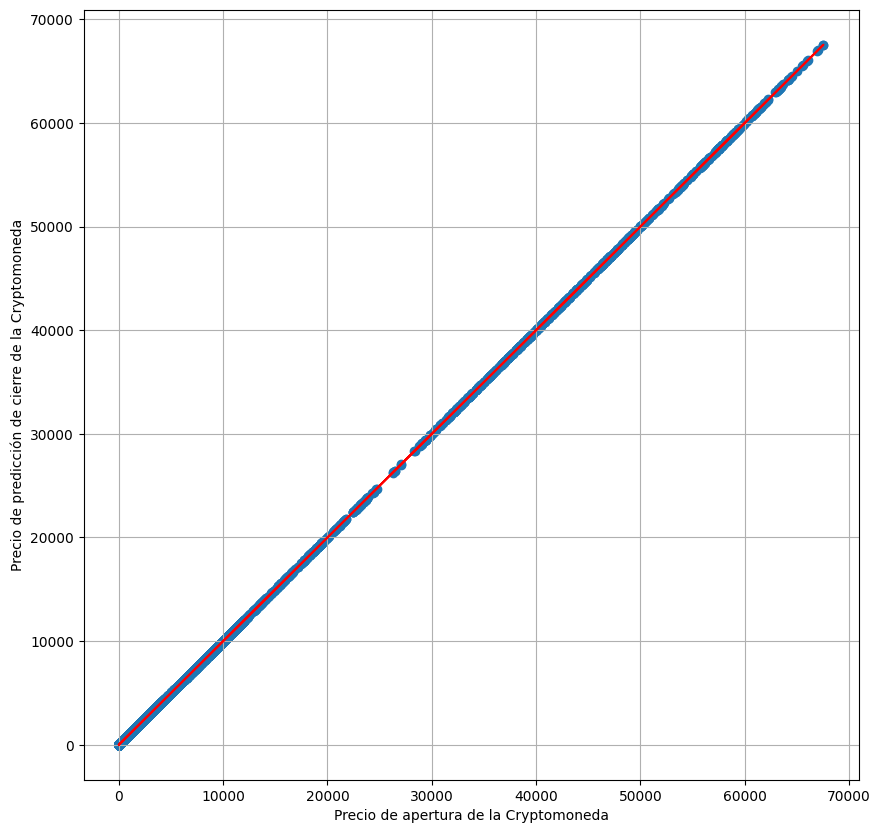

In [40]:
fig = plt.figure(figsize=(10,10))
plt.scatter(Cryptos['open'], Cierre_pred)
#plt.plot(Cryptos['open'], Cryptos['close'], ":")
plt.plot(Cryptos['open'], Cierre_pred, color='r')
plt.xlabel('Precio de apertura de la Cryptomoneda')
plt.ylabel('Precio de predicción de cierre de la Cryptomoneda')
plt.grid()

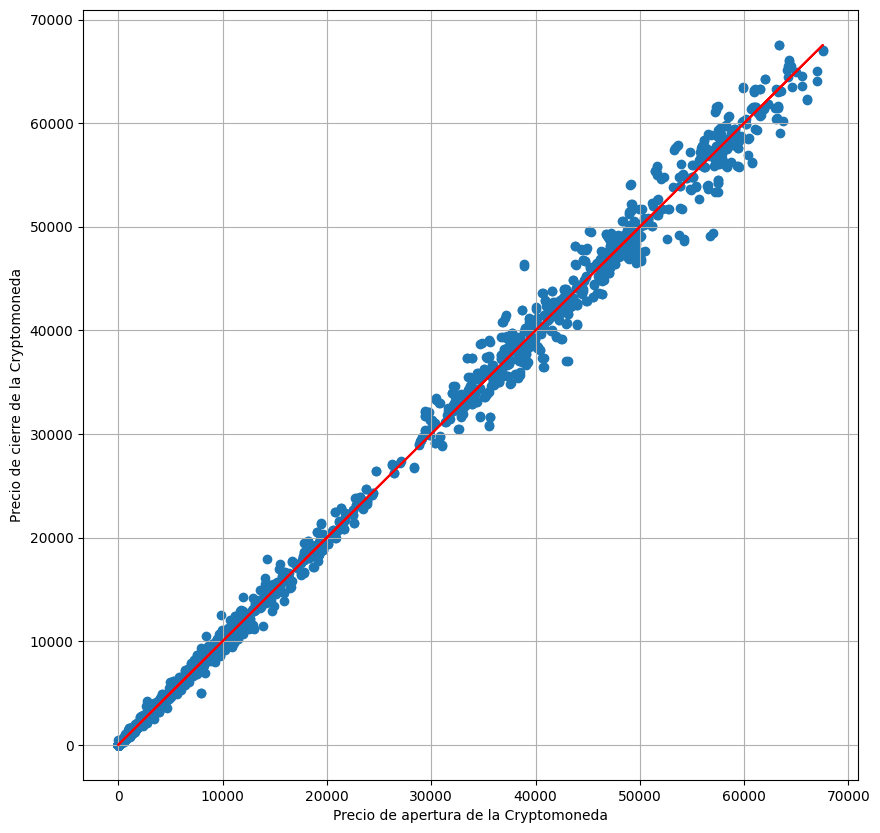

In [41]:
fig = plt.figure(figsize=(10,10))
plt.scatter(Cryptos['open'], Cryptos['close'])
#plt.plot(Cryptos['open'], Cryptos['close'], ":")
plt.plot(Cryptos['open'], Cierre_pred, color='r')
plt.xlabel('Precio de apertura de la Cryptomoneda')
plt.ylabel('Precio de cierre de la Cryptomoneda')
plt.grid()